In [43]:
import numpy as np
import matplotlib.pyplot as plt
import lorm
import disc.energy_curveling_g24

In [44]:
#initial curve as points on the double sphere S^2 x S^2
m = 128
s2 = lorm.manif.Sphere2()
points = lorm.manif.ManifoldPointArrayParameterized(s2)
points.coords = np.random.randn(2*m,3)
local_coords = np.zeros([2*m,2])
for i in range(m):
    local_coords[2*i,0] = np.sin(2*np.pi*i/m)+0.1 
    local_coords[2*i,1] = np.cos(2*np.pi*i/m)-0.1 
    local_coords[2*i+1,0] = np.sin(2*np.pi*i/m)+0.2
    local_coords[2*i+1,1] = np.cos(2*np.pi*i/m)-0.1
points.local_coords = local_coords

In [45]:
m = int(points.coords.shape[0]/2) # divide by 2 since the points are on the double sphere
N = 2
energy = disc.energy_curveling_g24.plan(m,N, 0.004,16,m=3,sigma=2)

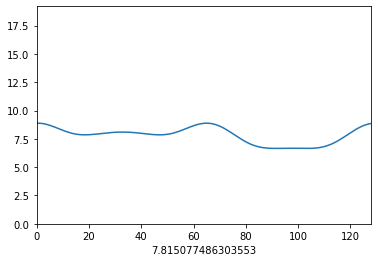

In [46]:
# plot the distance of consecutive points on the curve
fig = plt.figure()
bx = fig.add_subplot(111)
bx.axis(np.array([0,m,0,1.2*energy._L]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.local_coords)))
distance = plt.Line2D(np.linspace(0,m,m),m*energy._eval_lengths(points.local_coords))
bx.add_line(distance)

In [47]:
method = lorm.optim.ConjugateGradientMethod(max_iter=50)
points = method.run(energy,points)

Initial value: f[0] = 0.9927471952213776
f[1] = 0.6462927999779647
f[2] = 0.6359387734669215
f[3] = 0.6243790556908839
f[4] = 0.6105887538531317
f[5] = 0.5926352149051557
f[6] = 0.5662749614645649
f[7] = 0.5458018141576602
f[8] = 0.5231965781197792
f[9] = 0.49753577875258803
f[10] = 0.47043957168559086
f[11] = 0.4434584966902799
f[12] = 0.4116971804987144
f[13] = 0.3824487814770288
f[14] = 0.3555419769205218
f[15] = 0.3296320550255352
f[16] = 0.3073888039871864
f[17] = 0.2926998685584969
f[18] = 0.28121554129076154
f[19] = 0.2697957283345064
f[20] = 0.2568081359961349
f[21] = 0.23927045548666523
f[22] = 0.22167325625233295
f[23] = 0.20627791007460616
f[24] = 0.1923198403308392
f[25] = 0.1808130113641626
f[26] = 0.17038111736451808
f[27] = 0.16029122950883942
f[28] = 0.15270336389052575
f[29] = 0.1469665701901562
f[30] = 0.1425508593878871
f[31] = 0.13904803195362114
f[32] = 0.13546889168791754
f[33] = 0.13244061018138517
f[34] = 0.12967505591953457
f[35] = 0.12693100469629873
f[36] = 0

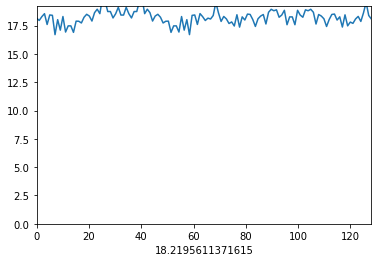

In [48]:
# plot the distance of consecutive points on the curve
fig = plt.figure()
bx = fig.add_subplot(111)
bx.axis(np.array([0,m,0,1.2*energy._L]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.local_coords)))
distance = plt.Line2D(np.linspace(0,m,m),m*energy._eval_lengths(points.local_coords))
bx.add_line(distance)

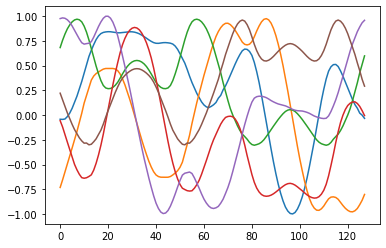

In [49]:
# plotting the components of the parameterization in R^6
for i in range(2):
    for k in range(3):
        plt.plot(points.coords[(0+i):(2*m+i):2,k])

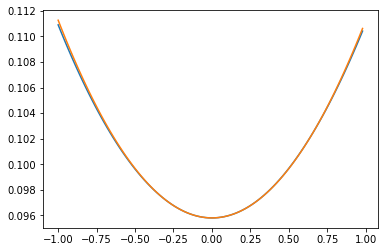

In [50]:
# compute quadratice approximation to test the gradient and Hessian
v=energy.grad(points)
v.coords = 0.01*np.random.randn(2*m,3)
f,q, s = lorm.utils.eval_objective_function_with_quadratic_approximation(energy,v)
plt.plot(s,f,s,q)